In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import fetch_openml
car_data=fetch_openml(name='car',version=2, parser='auto')

In [4]:
type(car_data)

sklearn.utils._bunch.Bunch

In [5]:
car_data.details

{'id': '991',
 'name': 'car',
 'version': '2',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2014-10-04T22:44:31',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/53525/car.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'file_id': '53525',
 'default_target_attribute': 'binaryClass',
 'tag': ['Chemistry',
  'derived',
  'Life Science',
  'mythbusting_1',
  'study_1',
  'study_15',
  'study_20',
  'study_41',
  'study_7'],
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:17:54',
 'md5_checksum': '49c57b793eef1b8e55f297e5e019fdbf'}

In [6]:
car_data.details['version']

'2'

In [7]:
print(car_data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


In [8]:
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [9]:
car_data=car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [10]:
type(car_data)

pandas.core.frame.DataFrame

In [11]:
from sklearn.model_selection import train_test_split
train_data, test_data=train_test_split(car_data, test_size=0.3, random_state=20)
print('The size of training datais :{}\n The size of testing data is: {}'.format (len(train_data) , len(test_data)))

The size of training datais :1209
 The size of testing data is: 519


In [12]:
train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1209,1209,1209,1209,1209,1209,1209
unique,4,4,4,3,3,3,2
top,med,high,5more,more,big,med,P
freq,327,311,319,418,411,406,849


In [13]:
train_data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
binaryClass,0


In [14]:
train_data['buying'].value_counts()

,count
buying,
med,327
high,307
vhigh,291
low,284


In [15]:
train_data['maint'].value_counts()

,count
maint,
high,311
med,311
vhigh,294
low,293


In [16]:
train_data['doors'].value_counts()

,count
doors,
5more,319
2,312
4,296
3,282


In [17]:
train_data['persons'].value_counts()

,count
persons,
more,418
2,407
4,384


<Axes: xlabel='buying', ylabel='count'>

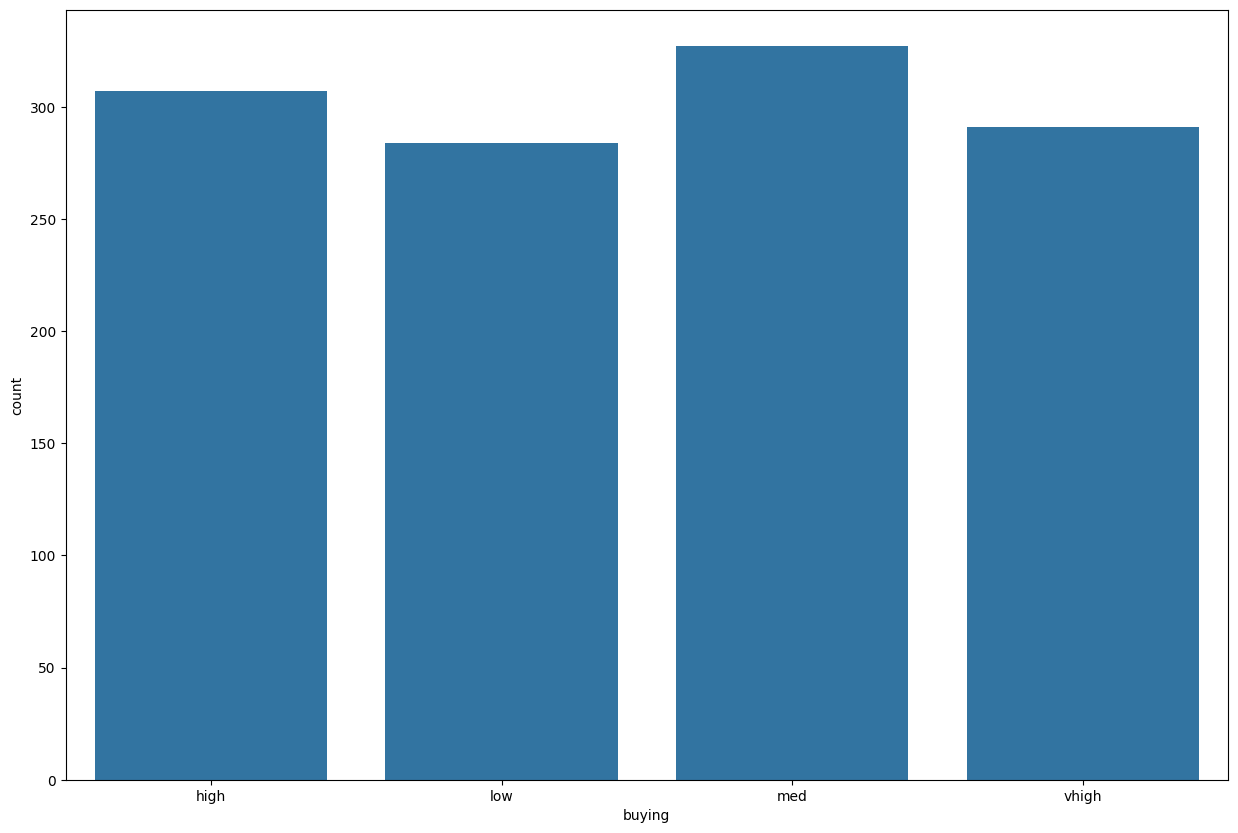

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(train_data, x='buying')

<Axes: xlabel='buying', ylabel='count'>

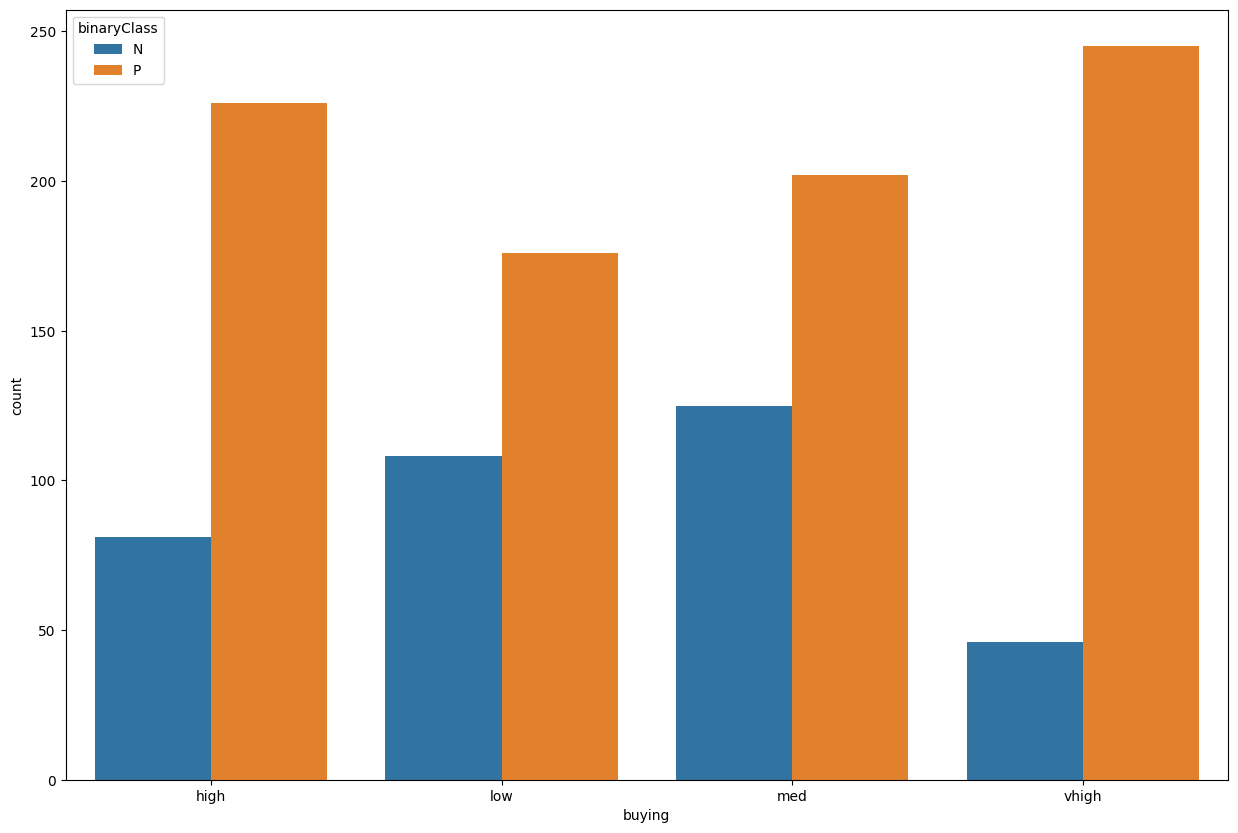

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying', hue='binaryClass')

In [20]:
train_data['maint'].value_counts()

,count
maint,
high,311
med,311
vhigh,294
low,293


In [21]:
vtrain_data['doors'].value_counts()

,count
doors,
5more,319
2,312
4,296
3,282


<Axes: xlabel='doors', ylabel='count'>

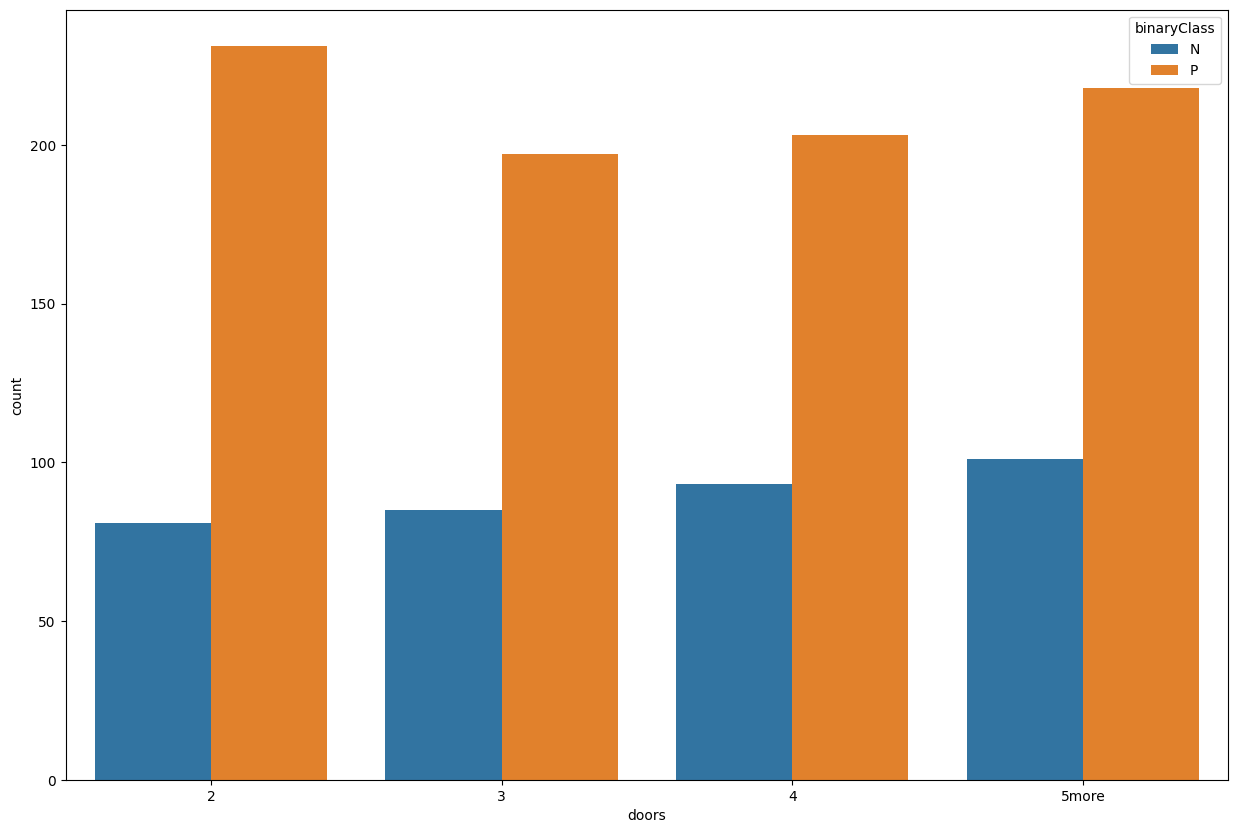

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(data = train_data,x = 'doors', hue= 'binaryClass')

In [24]:
train_data['persons'].value_counts()

,count
persons,
more,418
2,407
4,384


<Axes: xlabel='persons', ylabel='count'>

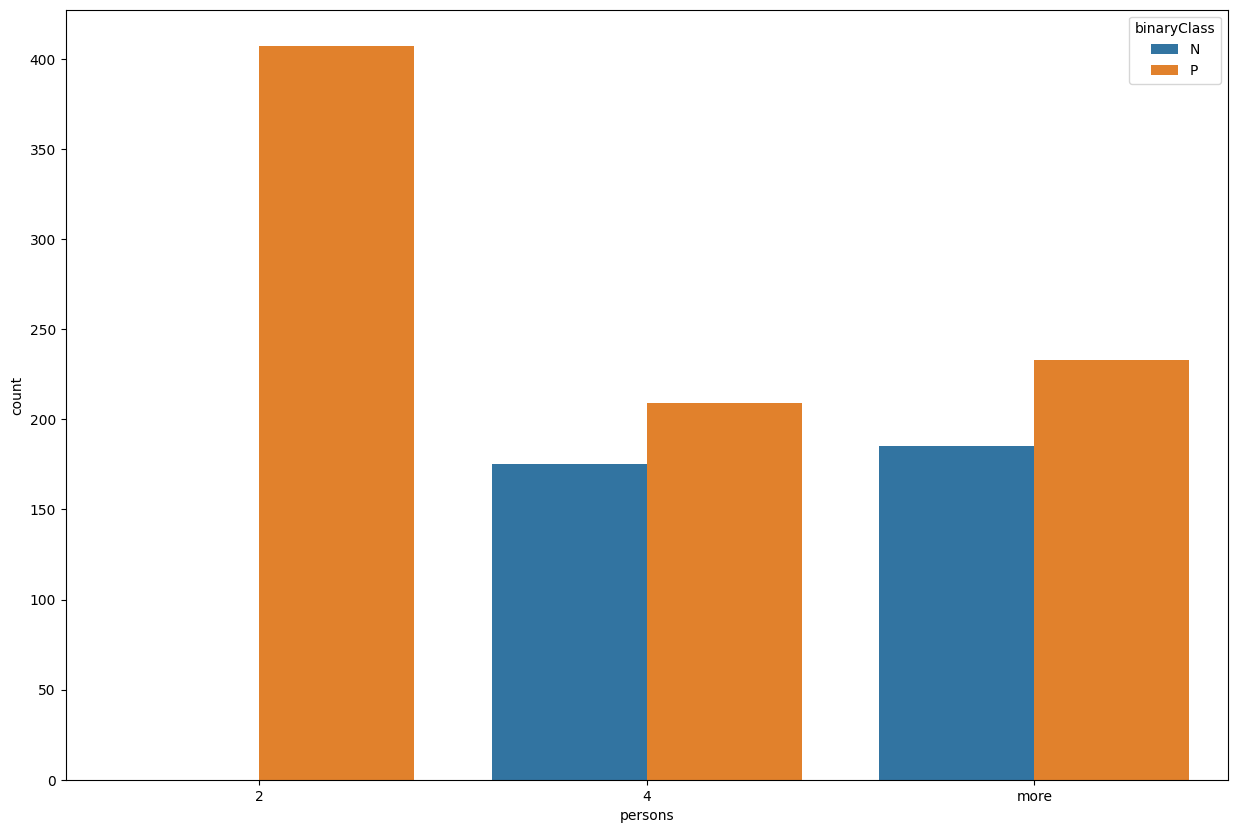

In [25]:
plt.figure(figsize=(15,10))
sns.countplot(data = train_data,x = 'persons', hue= 'binaryClass')

In [26]:
train_data['safety'].value_counts()


,count
safety,
med,406
low,402
high,401


<Axes: xlabel='safety', ylabel='count'>

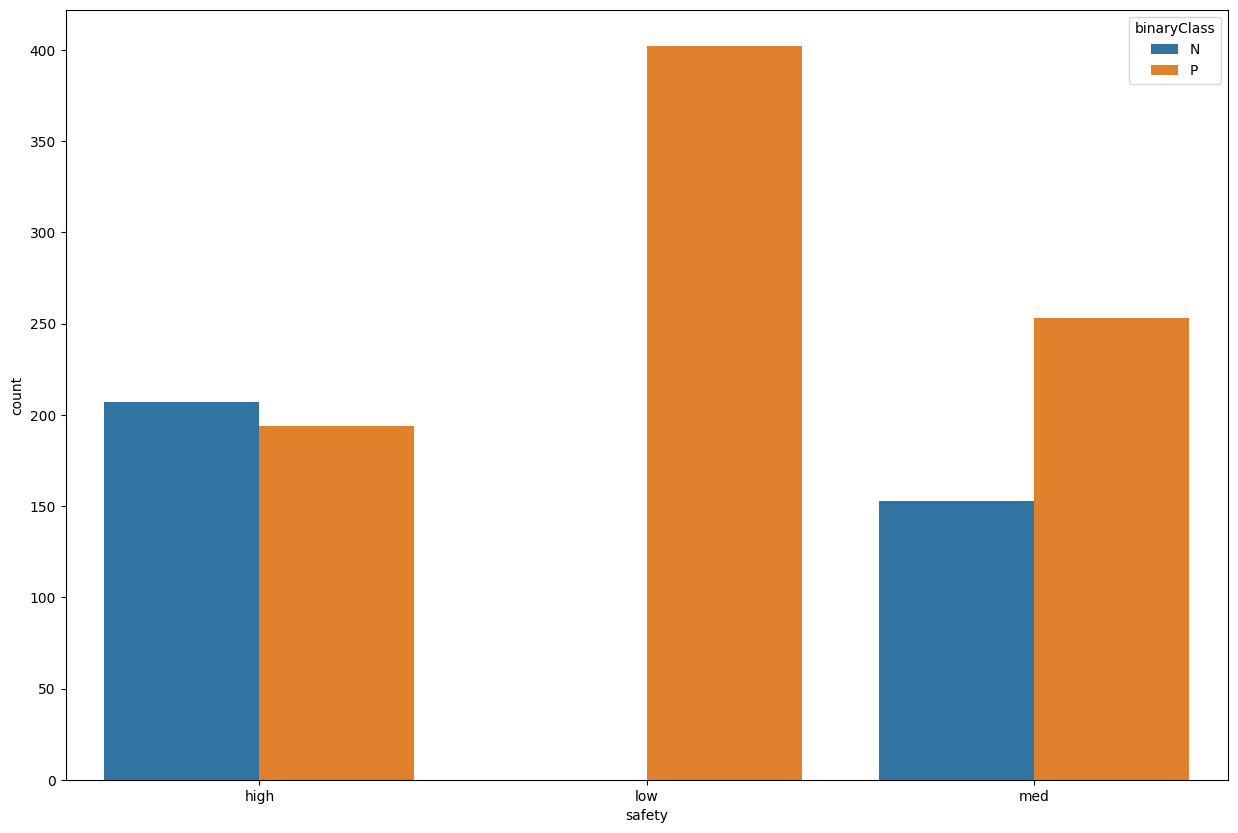

In [27]:
plt.figure(figsize=(15,10))
sns.countplot(data = train_data,x = 'safety', hue= 'binaryClass')


In [28]:
train_data['binaryClass'].value_counts()

,count
binaryClass,
P,849
N,360


<Axes: xlabel='binaryClass', ylabel='count'>

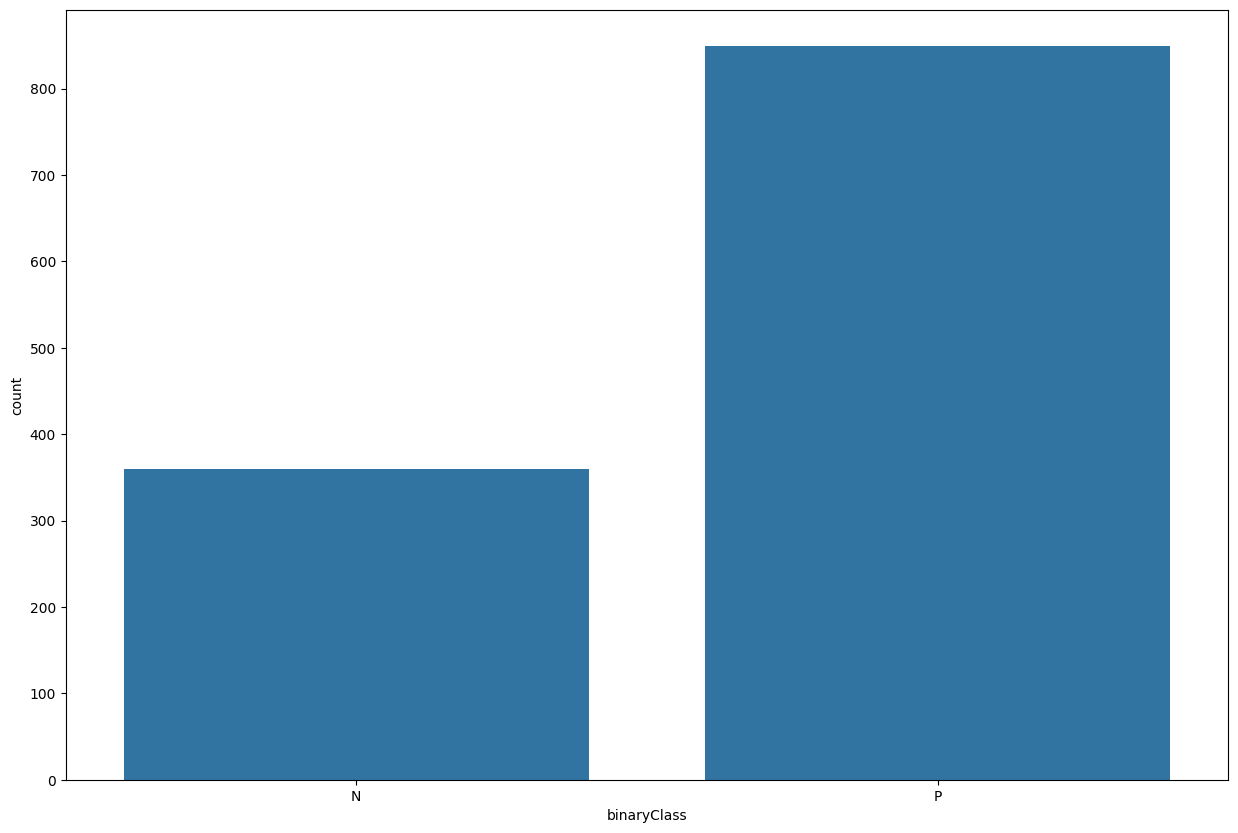

In [29]:
plt.figure(figsize=(15,10))
sns.countplot(data = train_data,x = 'binaryClass')

In [30]:
car_train = train_data.drop('binaryClass', axis = 1)
car_labels = train_data[['binaryClass']]

In [31]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
pipe = Pipeline([('ord_enc', OrdinalEncoder())])
car_train_prepared = pipe.fit_transform(car_train)

In [32]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
car_labels_prepared = label_enc.fit_transform(car_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(car_train_prepared, car_labels_prepared)

DecisionTreeClassifier()

In [34]:
from sklearn import tree
text_representation = tree.export_text(tree_clf)
print(text_representation)

|--- feature_3 <= 0.50
|   |--- class: 1
|--- feature_3 >  0.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_0 <= 2.50
|   |   |   |--- feature_1 <= 2.50
|   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_3 >  1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  2.50
|   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |   |   |--- class: 0
|   | 

In [35]:
from sklearn.metrics import accuracy_score
def accuracy(input_data, model, labels):
    preds = model.predict(input_data)
    acc = accuracy_score(labels,preds)
    return acc

In [36]:
from sklearn.metrics import pair_confusion_matrix
def conf_matrix(input_data, model, labels):
    preds = model.predict(input_data)
    cm = pair_confusion_matrix(labels,preds)
    return cm

In [37]:
from sklearn.metrics import classification_report
def class_report(input_data, model, labels):
    preds = model.predict(input_data)
    report = classification_report(labels,preds)
    report = print(report)
    return report

In [38]:
accuracy(car_train_prepared, tree_clf, car_labels_prepared)

1.0

In [39]:
conf_matrix(car_train_prepared, tree_clf, car_labels_prepared)

array([[611280,      0],
       [     0, 849192]])

In [40]:
class_report(car_train_prepared, tree_clf, car_labels_prepared)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       360
           1       1.00      1.00      1.00       849

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209



In [41]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [42]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
from sklearn.model_selection import GridSearchCV
params_grid = {'max_leaf_nodes' : list(range(0, 10)),
               'min_samples_split' : [0,1,2, 3, 4],
               'min_samples_leaf' : [0,1, 2, 3,4],
               'max_depth' : [0,1,2,3,4,5],
               'max_features' : [0,1,2,3,4,5]}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'), params_grid, verbose=1, cv=3, refit=True)
grid_search.fit(car_train_prepared, car_labels_prepared)

Fitting 3 folds for each of 9000 candidates, totalling 27000 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5],
                         'max_features': [0, 1, 2, 3, 4, 5],
                         'max_leaf_nodes': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [0, 1, 2, 3, 4],
                         'min_samples_split': [0, 1, 2, 3, 4]},
             verbose=1)

In [49]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 5,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [50]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_features=5,
                       max_leaf_nodes=9, random_state=42)

In [51]:
tree_best=grid_search.best_estimator_

In [52]:
car_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'binaryClass'],
      dtype='object')

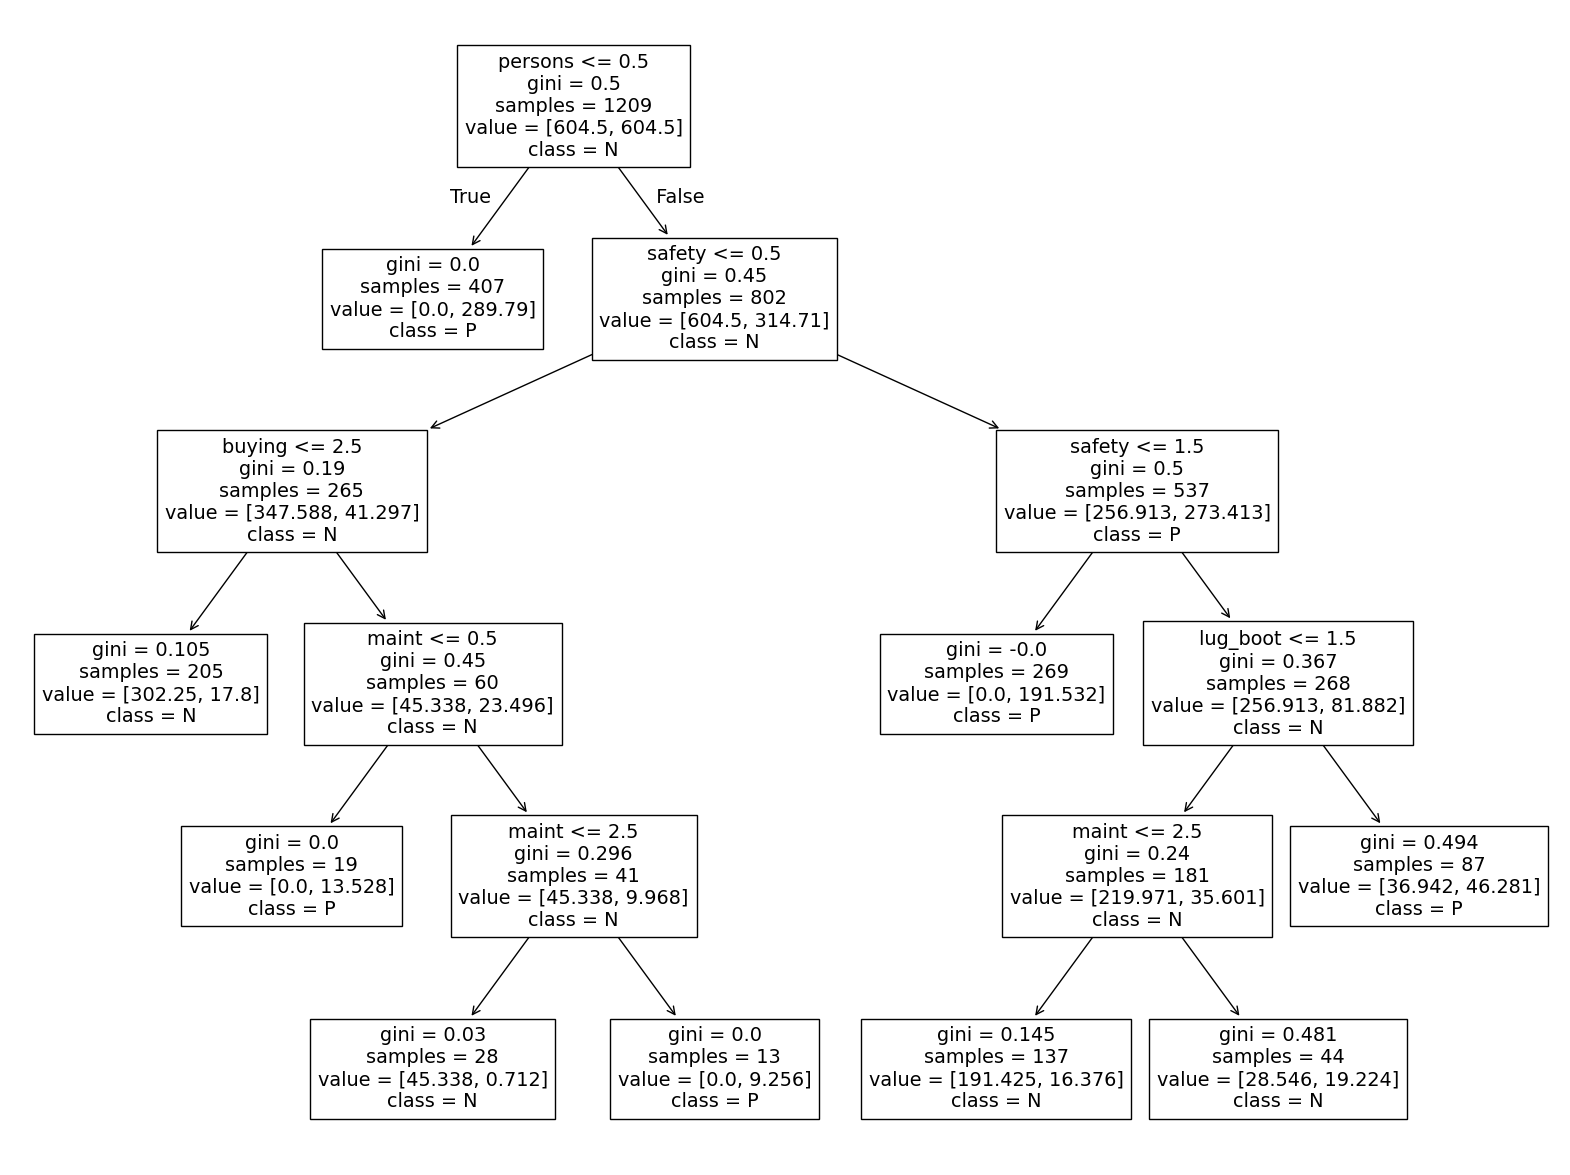

In [54]:
import matplotlib.pyplot as plt # Importing the matplotlib.pyplot module and aliasing it as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15)) # Using the aliased name plt to access the figure function
plot_tree(tree_best, feature_names=car_train.columns, class_names=['N','P']);